# Crawling Data Politik

Pada Bagian ini akan dilakukan Crawling Data dengan Kategori Politik pada halaman website berita Detik.com

In [1]:
!pip install requests beautifulsoup4

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Inisialisasi list untuk menyimpan data dari semua halaman
all_data = []

# Jumlah halaman yang ingin di-crawl
total_pages = 1

# Looping untuk mengambil judul dan isi konten berita dari setiap halaman
for page in range(1, total_pages + 1):
    # URL target dengan nomor halaman
    url = f"https://news.detik.com/indeks/{page}"

    # Mengirim permintaan HTTP GET ke URL
    response = requests.get(url)

    # Memeriksa apakah permintaan berhasil
    if response.status_code == 200:
        # Parsing HTML dengan BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Cari semua elemen <h3> dengan class 'media__title'
        judul_berita_elements = soup.find_all('h3', class_='media__title')

        # Looping untuk mengambil judul dan isi konten dari setiap berita
        for judul_element in judul_berita_elements:
            # Mengambil judul berita
            judul_berita = judul_element.text.strip()

            # Mengambil URL selengkapnya
            selengkapnya_link = judul_element.find('a')['href']

            # Mengirim permintaan HTTP GET ke halaman selengkapnya
            selengkapnya_response = requests.get(selengkapnya_link)
            if selengkapnya_response.status_code == 200:
                selengkapnya_soup = BeautifulSoup(selengkapnya_response.text, 'html.parser')
                # Mencari dan mengambil isi konten berita
                isi_berita_elements = selengkapnya_soup.find_all('div', class_='detail__body-text')
                isi_berita = "\n".join([elem.text.strip() for elem in isi_berita_elements])
            else:
                isi_berita = "Tidak dapat mengambil berita"

            # Menambahkan data ke list
            all_data.append([judul_berita] + [isi_berita])

    else:
        print(f"Gagal mengambil halaman {url}, kode status: {response.status_code}")

# Membuat DataFrame dari list data
berita_online = pd.DataFrame(all_data, columns=["Judul Berita", "Isi Berita"])

In [3]:
berita_online

,Judul Berita,Isi Berita
0,"COVID-19 Naik di ASEAN, Bandara Soetta Bakal A...",Jakarta - Pandemi COVID-19 sudah berlalu tapi ...
1,"Kebakaran Rumah di Jaktim, 1 Warga Tewas Akiba...","Jakarta - Satu unit rumah di Rawamangun, Jakar..."
2,Prasetyo Edi Apresiasi Langkah Pemprov DKI Res...,Jakarta - Setelah tiga tahun menanti keseriusa...
3,Panca Ngaku Menyesal Usai Membunuh dan Ingin M...,Jakarta - Panca Darmansyah alias Panca (41) m...
4,DPRD Surabaya Apresiasi Pemkot Revitalisasi Ka...,Jakarta - Wakil Ketua DPRD Kota Surabaya AH Th...
5,Prabowo-Gibran Teratas di Survei LSI Denny JA,Jakarta - Lembaga survei LSI Denny JA merilis ...
6,"Kasus Covid Meningkat Lagi, Wamenkes Sebut Mas...",Jakarta - Wabah Covid-19 kini tengah meningkat...
7,Tilang Manual Sementara Tak Berlaku saat Libur...,Jakarta - Tilang manual sementara tidak diber...
8,Satpol PP DKI Tutup Klub Malam KODE Jakarta Bu...,Jakarta - Satpol PP Provinsi DKI Jakarta menut...
9,Ada Luka Punggung-Leher Wanita Tewas di Kolong...,Bogor - Kasat Reskrim Polresta Bogor Kota Komp...


# Bentuk TF-IDF isi berita

In [4]:
#Mengambil 5 data sebagai contoh
data = berita_online['Isi Berita'].head(5)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Mengubah teks berita menjadi vektor TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# Membuat DataFrame untuk hasil TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# Cosine Similarity
---

Cosine similarity adalah suatu metrik atau pengukuran yang digunakan untuk mengukur sejauh mana dua vektor arah mendekati satu sama lain. Teknik ini umumnya digunakan dalam analisis teks dan pertambangan data untuk membandingkan kedekatan antara dua dokumen atau dua vektor fitur dalam ruang vektor.

Pertimbangkan dua vektor A dan B, cosine similarity (cosine_similarity(A,B)cosine_similarity(A,B)) dihitung dengan rumus berikut:



Dengan menggunakan cosine similarity, nilai yang diperoleh berkisar antara -1 dan 1. Nilai 1 menunjukkan kedua vektor identik, nilai 0 menunjukkan bahwa vektor-vektor tersebut ortogonal (tidak ada kesamaan), dan nilai -1 menunjukkan bahwa vektor-vektor tersebut berlawanan arah.


In [6]:
df_tfidf

,02,06,07,107,11,12,131,15,19,1966,...,wisata,with,xbb,ya,yaitu,yakin,yakni,yang,yossi,zona
0,0.000000,0.034964,0.000000,0.034964,0.016661,0.016661,0.034964,0.000000,0.279713,0.000000,...,0.000000,0.016661,0.034964,0.000000,0.034964,0.000000,0.00000,0.116624,0.000000,0.000000
1,0.046044,0.000000,0.046044,0.000000,0.021940,0.043881,0.000000,0.111445,0.000000,0.000000,...,0.000000,0.021940,0.000000,0.000000,0.000000,0.000000,0.00000,0.109702,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.016710,0.016710,0.000000,0.000000,0.000000,0.035067,...,0.000000,0.016710,0.000000,0.084875,0.000000,0.000000,0.00000,0.016710,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.034208,0.034208,0.000000,0.028959,0.000000,0.000000,...,0.000000,0.017104,0.000000,0.086878,0.000000,0.035894,0.00000,0.171038,0.071789,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.011589,0.011589,0.000000,0.000000,0.000000,0.000000,...,0.072961,0.011589,0.000000,0.000000,0.000000,0.000000,0.04864,0.069532,0.000000,0.121601


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Menghitung matriks similarity
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Membuat DataFrame untuk similarity matrix
df_similarity = pd.DataFrame(similarity_matrix, columns=range(1, len(data) + 1), index=range(1, len(data) + 1))


In [8]:
# Menampilkan similarity matrix
print("Similarity Matrix:")
df_similarity

Similarity Matrix:


,1,2,3,4,5
1,1.000000,0.107657,0.053045,0.120859,0.105355
2,0.107657,1.000000,0.046911,0.114786,0.063483
3,0.053045,0.046911,1.000000,0.069476,0.085815
4,0.120859,0.114786,0.069476,1.000000,0.065109
5,0.105355,0.063483,0.085815,0.065109,1.000000


# Graph
---

In [9]:
!pip install networkx matplotlib

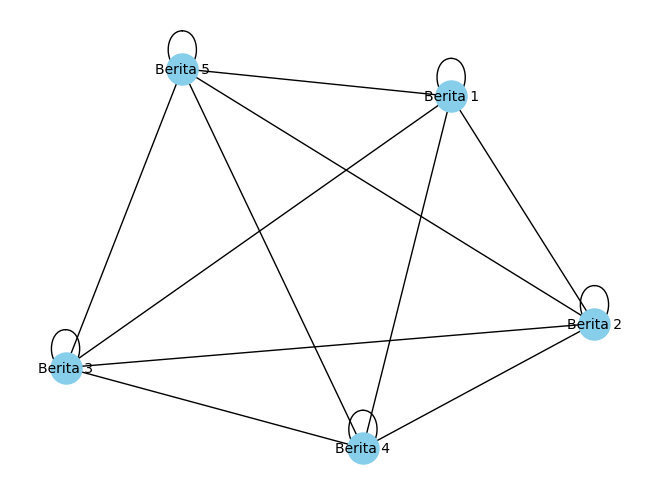

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Mengatur label pada node
labels = {i: f"Berita {i}" for i in G.nodes}

# Membuat posisi node (gunakan salah satu algoritma posisi, misalnya spring_layout)
pos = nx.spring_layout(G)

# Menggambar graf
nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='skyblue', font_size=10, font_color='black')

# Menampilkan graf
plt.show()


# Closeness Centrality
---

In [11]:
import networkx as nx

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menampilkan closeness centrality dari setiap node
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

Node 5: Closeness Centrality = 1.0
Node 4: Closeness Centrality = 1.0
Node 3: Closeness Centrality = 1.0
Node 2: Closeness Centrality = 1.0
Node 1: Closeness Centrality = 1.0


In [12]:
import networkx as nx

# Menggunakan similarity matrix dari contoh sebelumnya
G = nx.from_pandas_adjacency(df_similarity)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Menghitung PageRank
pagerank = nx.pagerank(G)

# Menghitung eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Menambahkan closeness centrality, pagerank, dan eigenvector centrality ke setiap node
for node, centrality in closeness_centrality.items():
    G.nodes[node]['Closeness Centrality'] = centrality
    G.nodes[node]['PageRank'] = pagerank[node]
    G.nodes[node]['Eigenvector Centrality'] = eigenvector_centrality[node]

# Menampilkan closeness centrality, pagerank, dan eigenvector centrality dari setiap node
for node, data in G.nodes(data=True):
    closeness = data['Closeness Centrality']
    pagerank = data['PageRank']
    eigenvector = data['Eigenvector Centrality']
    print(f"Node {node}: Closeness Centrality = {closeness}, PageRank = {pagerank}, Eigenvector Centrality = {eigenvector}")


Node 5: Closeness Centrality = 1.0, PageRank = 0.1987999957237204, Eigenvector Centrality = 0.4472135954999579
Node 4: Closeness Centrality = 1.0, PageRank = 0.20339080069853618, Eigenvector Centrality = 0.4472135954999579
Node 3: Closeness Centrality = 1.0, PageRank = 0.19325067199568757, Eigenvector Centrality = 0.4472135954999579
Node 2: Closeness Centrality = 1.0, PageRank = 0.19951725061687023, Eigenvector Centrality = 0.4472135954999579
Node 1: Closeness Centrality = 1.0, PageRank = 0.2050412809651852, Eigenvector Centrality = 0.4472135954999579


#Ekstraksi Dokumen Olahraga
---

In [13]:
!pip install requests beautifulsoup4

In [14]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Inisialisasi list untuk menyimpan data dari semua halaman
all_data = []

# Jumlah halaman yang ingin di-crawl
total_pages = 1

# Looping untuk mengambil judul dan isi konten berita dari setiap halaman
for page in range(1, total_pages + 1):
    # URL target dengan nomor halaman
    url = f"https://sport.detik.com/indeks/{page}"

    # Mengirim permintaan HTTP GET ke URL
    response = requests.get(url)

    # Memeriksa apakah permintaan berhasil
    if response.status_code == 200:
        # Parsing HTML dengan BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Cari semua elemen <h3> dengan class 'media__title'
        judul_berita_elements = soup.find_all('h3', class_='media__title')

        # Looping untuk mengambil judul dan isi konten dari setiap berita
        for judul_element in judul_berita_elements:
            # Mengambil judul berita
            judul_berita = judul_element.text.strip()

            # Mengambil URL selengkapnya
            selengkapnya_link = judul_element.find('a')['href']

            # Mengirim permintaan HTTP GET ke halaman selengkapnya
            selengkapnya_response = requests.get(selengkapnya_link)
            if selengkapnya_response.status_code == 200:
                selengkapnya_soup = BeautifulSoup(selengkapnya_response.text, 'html.parser')
                # Mencari dan mengambil isi konten berita
                isi_berita_elements = selengkapnya_soup.find_all('div', class_='detail__body-text')
                isi_berita = "\n".join([elem.text.strip() for elem in isi_berita_elements])
            else:
                isi_berita = "Tidak dapat mengambil berita"

            # Menambahkan data ke list
            all_data.append([judul_berita] + [isi_berita])

    else:
        print(f"Gagal mengambil halaman {url}, kode status: {response.status_code}")

# Membuat DataFrame dari list data
berita_online = pd.DataFrame(all_data, columns=["Judul Berita", "Isi Berita"])

In [15]:
berita_online

,Judul Berita,Isi Berita
0,"Foto: BNI Sirnas Premier, Ajang Persaingan Par...",Jakarta - BNI Sirnas Premier 2023 mulai bergul...
1,Marc Marquez Ungkap Alasan Sering Jatuh dengan...,Jakarta - Marc Marquez mengungkap alasan serin...
2,Dewa United Banten Pasang Target Juara IBL 2024,Jakarta - Klub Dewa United Banten memasang tar...
3,"Sengit, Surya/Revandra Kalahkan Davin/Ozora di...",Jakarta - Duel sengit hadir di 32 besar Ganda ...
4,Marc Marquez: Kepergianku dari Honda Jadi Win-...,Jakarta - Superstar MotoGP Marc Marquez percay...
5,Pelatih Pastikan Ginting dan Jojo Prima Jelang...,"Jakarta - Pelatih tunggal putra, Irwansyah, me..."
6,Michael Owen/Velisha ke 16 Besar BNI Sirnas Pr...,Jakarta - Pasangan Michael Owen/Velisha Christ...
7,BWF World Tour Finals 2023: Tim Bulutangkis In...,Jakarta - Tim bulutangkis Indonesia untuk BWF ...
8,"Diikuti 5.000 Pelari, PLN Electric Run Bantu K...",Jakarta - PT PLN (Persero) sukses menggelar PL...
9,BNI Sirnas Premier Jakarta 2023 Diikuti 762 At...,Jakarta - BNI Sirkuit Nasional memasuki seri p...


#Ekstraksi Dokumen Kesehatan
---

In [16]:
!pip install requests beautifulsoup4

In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Inisialisasi list untuk menyimpan data dari semua halaman
all_data = []

# Jumlah halaman yang ingin di-crawl
total_pages = 1

# Looping untuk mengambil judul dan isi konten berita dari setiap halaman
for page in range(1, total_pages + 1):
    # URL target dengan nomor halaman
    url = f"https://health.detik.com/indeks/{page}"

    # Mengirim permintaan HTTP GET ke URL
    response = requests.get(url)

    # Memeriksa apakah permintaan berhasil
    if response.status_code == 200:
        # Parsing HTML dengan BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Cari semua elemen <h3> dengan class 'media__title'
        judul_berita_elements = soup.find_all('h3', class_='media__title')

        # Looping untuk mengambil judul dan isi konten dari setiap berita
        for judul_element in judul_berita_elements:
            # Mengambil judul berita
            judul_berita = judul_element.text.strip()

            # Mengambil URL selengkapnya
            selengkapnya_link = judul_element.find('a')['href']

            # Mengirim permintaan HTTP GET ke halaman selengkapnya
            selengkapnya_response = requests.get(selengkapnya_link)
            if selengkapnya_response.status_code == 200:
                selengkapnya_soup = BeautifulSoup(selengkapnya_response.text, 'html.parser')
                # Mencari dan mengambil isi konten berita
                isi_berita_elements = selengkapnya_soup.find_all('div', class_='detail__body-text')
                isi_berita = "\n".join([elem.text.strip() for elem in isi_berita_elements])
            else:
                isi_berita = "Tidak dapat mengambil berita"

            # Menambahkan data ke list
            all_data.append([judul_berita] + [isi_berita])

    else:
        print(f"Gagal mengambil halaman {url}, kode status: {response.status_code}")

# Membuat DataFrame dari list data
berita_online = pd.DataFrame(all_data, columns=["Judul Berita", "Isi Berita"])

In [18]:
berita_online

,Judul Berita,Isi Berita
0,Pakar Ungkap Kemungkinan Lonjakan Mycoplasma D...,Jakarta - Kementerian Kesehatan RI (Kemenkes) ...
1,Warga di Tobelo Halut Makin Mudah Akses Layana...,Jakarta - Pasien Puskesmas Pitu kini semakin m...
2,8 Tanda Ginjal Bermasalah pada Wanita yang Har...,Daftar Isi\n\n\n\n\r\n\t\t\t\t\t\t\tGejala Gin...
3,Varian JN.1 Disebut Picu Lonjakan Kasus COVID ...,Jakarta - Kementerian Kesehatan Singapura (MOH...
4,"Kasus COVID-19 Nanjak Lagi, Masih Butuh Vaksin...",Daftar Isi\n\n\n\n\r\n\t\t\t\t\t\t\tCakupan Va...
5,"Survei YLKI: 25,9 Persen Anak-Remaja Minum Min...",Jakarta - Yayasan Lembaga Konsumen Indonesia (...
6,"6 Gejala Penyakit Jantung Koroner, Bisa Muncul...",Daftar Isi\n\n\n\n\r\n\t\t\t\t\t\t\tGejala Pen...
7,"Wacana Vaksin COVID-19 Berbayar Tahun Depan, H...",Daftar Isi\n\n\n\n\r\n\t\t\t\t\t\t\tHarga vaks...
8,Estimasi Kasus Bunuh Diri di RI Capai 6 Ribu O...,Jakarta - Organisasi Kesehatan Dunia (WHO) men...
9,Bos WHO Beberkan Ngerinya Situasi di Gaza: Fas...,Jakarta - Dirjen Organisasi Kesehatan Dunia (W...
